## Observations and Insights

## Dependencies and starter code

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = df.groupby('Drug Regimen')

#Create summary df
stats_summary = pd.DataFrame({
    'Mean': regimen_df['Tumor Volume (mm3)'].mean(),
    'Median': regimen_df['Tumor Volume (mm3)'].median(),
    'Variance': regimen_df['Tumor Volume (mm3)'].var(),
    'Standard Deviation': regimen_df['Tumor Volume (mm3)'].std(),
    'SEM': regimen_df['Tumor Volume (mm3)'].sem()
})

#Show summary df
stats_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Data Points')

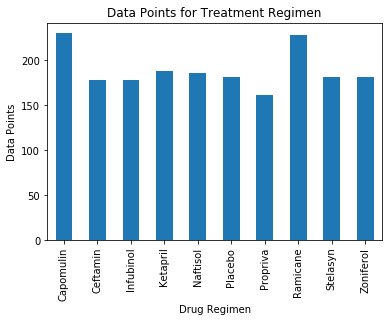

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
ax = regimen_df['Drug Regimen'].count().plot.bar()
ax.set_title('Data Points for Treatment Regimen')
ax.set_ylabel('Data Points')

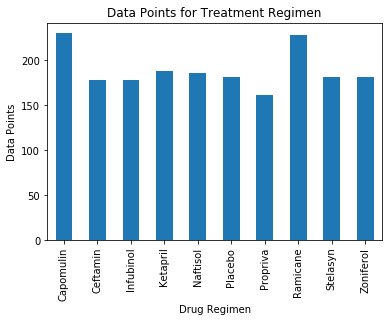

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
labels = regimen_df['Drug Regimen'].count().index
x_axis = np.arange(0, len(labels))

tick_locations = [value for value in x_axis]

plt.bar(x_axis, regimen_df['Drug Regimen'].count(), width = .5)
plt.xticks(tick_locations, labels, rotation = 'vertical')
plt.title('Data Points for Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Data Points')
plt.xlim(x_axis.min() - 0.5, x_axis.max() + 0.5)
plt.show()

## Pie plots

Text(0, 0.5, '')

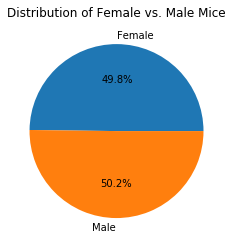

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df = df.groupby('Sex')
sex_df = sex_df['Mouse ID'].nunique()

ax = sex_df.plot.pie(autopct = '%1.1f%%')
ax.set_title('Distribution of Female vs. Male Mice')
ax.set_ylabel('')

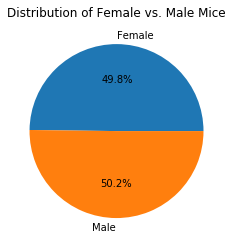

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex_df.index
counts = sex_df

plt.title('Distribution of Female vs. Male Mice')
plt.pie(counts, labels = labels, autopct = '%1.1f%%')
plt.show()

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [10]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [11]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [12]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [13]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen